In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import time

In [2]:
X = np.genfromtxt('handwritten_digits_images.csv', delimiter=',')
print("X.shape: " + str(X.shape))
y = np.genfromtxt('handwritten_digits_labels.csv', delimiter=',')
print("y.shape: " + str(y.shape))
# normalize the data
X /= 255

X.shape: (70000, 784)
y.shape: (70000,)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=17)

Find the number of components needed to explain 75% of the variance in the data

In [4]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
new_dims = np.argmax(cumsum >= 0.75) + 1
print("n_components chosen: " + str(new_dims))

n_components chosen: 33


Reduce the samples to 33 dims

In [5]:
pca = PCA(n_components=new_dims)
X_train_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_train_reduced)
X_test_reduced = pca.transform(X_test)
print("X_train_reduced.shape: " + str(X_train_reduced.shape))

X_train_reduced.shape: (63000, 33)


Visualize the compressed data

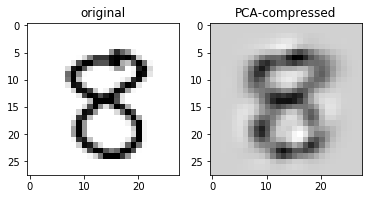

In [10]:
f = plt.figure()
f.add_subplot(1,2, 1)
plt.title("original")
plt.imshow(X_train[6].reshape((28,28)), cmap='Greys')
f.add_subplot(1,2, 2)

plt.title("PCA-compressed")
plt.imshow(X_recovered[6].reshape((28,28)), cmap='Greys')
plt.show(block=True)

Find a good value of n_neighbours

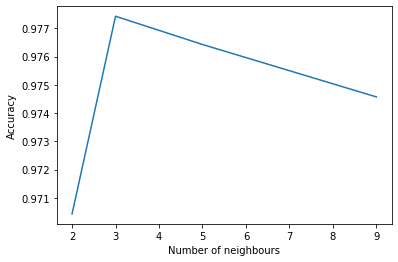

In [7]:
n_range = [2,3,5,9]
scores = []

for n in n_range:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_reduced, y_train)
    scores.append(knn.score(X_test_reduced, y_test))
    
plt.plot(n_range, scores)
plt.xlabel('Number of neighbours')
plt.ylabel('Accuracy')
plt.show()

Fit on reduced training data and check accuracy

In [8]:
knn = KNeighborsClassifier(n_neighbors=3)
start = time.time()
knn.fit(X_train_reduced,y_train)
end = time.time()
print("Fitting time: %.1f seconds" % (end-start))

Fitting time: 0.2 seconds


In [9]:
start = time.time()
print("Accuracy: %.4f" % knn.score(X_test_reduced, y_test))
end = time.time()
print("Score calculation time: %.1f seconds" % (end-start))

Accuracy: 0.9774
Score calculation time: 10.9 seconds
